Importy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown

nacitanie dat a pomocne funkcie

In [2]:
#nacitanie suboru
dogs = pd.read_csv("psy_data.csv", header=0).set_index("dog.id")

def get_subset(values):
    return dogs.loc[:, values ]

def get_mean():
    return dogs["separation_behavior_score"].mean()

rozdelenie psov na tie, ktore maju podla svojich majitelov separation anxiety a tych co ju nemaju

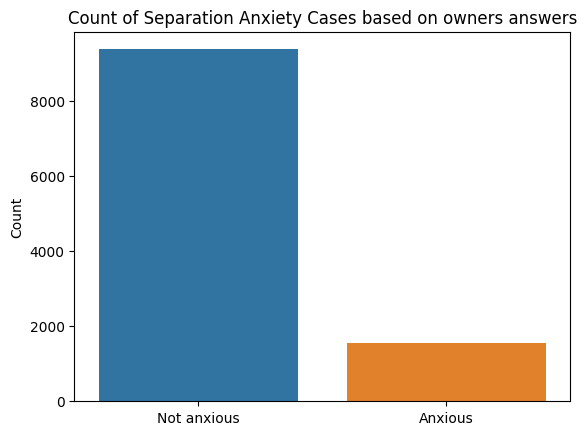

In [3]:
def graph_sep_anx1():
    subset = get_subset(["separation_anxiety", "separation_behavior_score"])
    sns.countplot(data=subset, x="separation_anxiety", hue="separation_anxiety", legend = False)
    plt.title("Count of Separation Anxiety Cases based on owners answers")
    plt.xlabel("")
    plt.xticks([0.0, 1.0], ["Not anxious", "Anxious"])
    plt.ylabel("Count")
#10927
#9373
#1554

graph_sep_anx1()

rozdelenie psov na tie, ktore maju podla snadpriemernu nameranu separation anxiety a tych co ju maju podpriemernu

15371
3018
7493


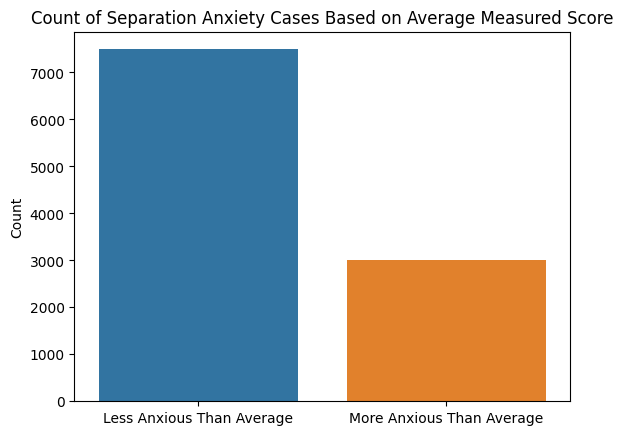

In [4]:
def graph_sep_anx2():
    mean = get_mean()
    subset = get_subset(["separation_anxiety", "separation_behavior_score"])
    print(len(subset))


    temp = []
    for i in subset["separation_behavior_score"]:
        if i<= mean:
            temp.append(0.0)
        elif i> mean:
            temp.append(1.0)
        else:
            temp.append(None)


    subset["anxious"] = temp
    print(len(subset.query("anxious == 1.0")))
    print(len(subset.query("anxious == 0.0")))

    sns.countplot(data=subset ,x="anxious",hue = "anxious")
    plt.title("Count of Separation Anxiety Cases Based on Average Measured Score")

    plt.xlabel("")
    plt.xticks([0.0, 1.0], ["Less Anxious Than Average", "More Anxious Than Average"])
    plt.ylabel("Count")
    plt.legend().remove()
graph_sep_anx2()

rozdelenie na psov co podla svojich majitelov nemaju spearation anxiety, ale podla nameranych hodnot ju maju nadpriemernu a tych co podla svojich majitelov maju sep anx, ale podla nameranych hodnot ju maju podpriemernu

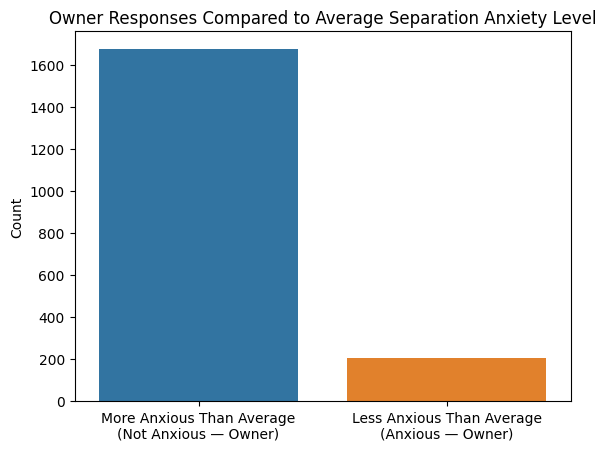

In [5]:
def graph_sep_anx3():
    mean = get_mean()
    subset = get_subset(["separation_anxiety", "separation_behavior_score"])
    sns.countplot(data=subset.query("separation_anxiety == 0 and separation_behavior_score>=@mean"), x="separation_anxiety")
    sns.countplot(data=subset.query("separation_anxiety == 1 and separation_behavior_score<=@mean"), x="separation_anxiety")

    plt.title("Owner Responses Compared to Average Separation Anxiety Level")
    plt.xlabel("")
    plt.xticks([0.0, 1.0], ["More Anxious Than Average\n(Not Anxious — Owner)", "Less Anxious Than Average\n(Anxious — Owner)"])
    plt.ylabel("Count")
graph_sep_anx3()

Pocet hodnot priznakov sep. anx.

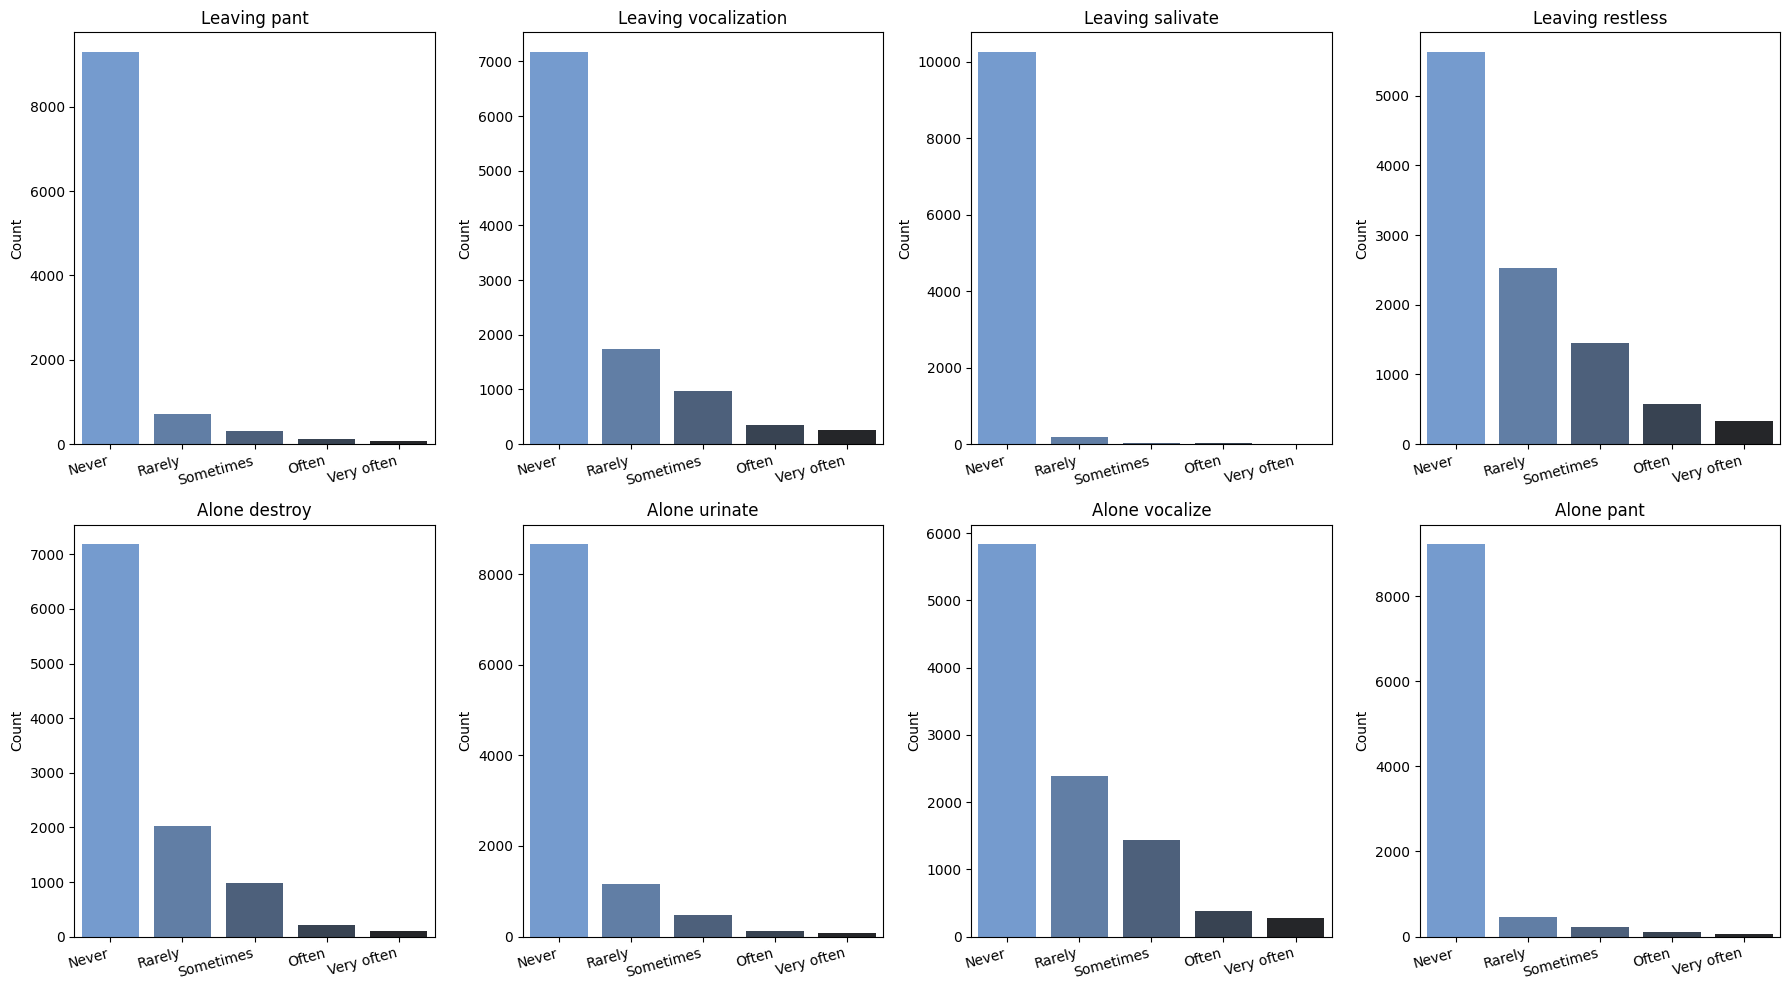

In [6]:
def graph_sep_anx4():
    mean = get_mean()
    columns = ['Leaving_pant', 'Leaving_vocalization', 'Leaving_salivate', 'Leaving_restless', 'Alone_destroy', 'Alone_urinate', 'Alone_vocalize', 'Alone_pant']
    subset = get_subset(["separation_anxiety", "separation_behavior_score"]+columns)


    fig, axes = plt.subplots(2, 4, figsize=(18, 10))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        
        sns.countplot(x=col, data=subset, ax=axes[i],hue = col, palette = sns.dark_palette("#69d", reverse=True, as_cmap=True))
        axes[i].set_title(col.replace("_", " "))
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Count")

        tick_labels = {0.0: "Never", 1.0: "Rarely", 2.0: "Sometimes", 3.0: "Often", 4.0: "Very often"}
        axes[i].set_xticks(list(tick_labels.keys()))
        axes[i].set_xticklabels(list(tick_labels.values()), rotation=15, ha='right')
        axes[i].legend().remove()
    plt.tight_layout()
    plt.show()
graph_sep_anx4()


priemery priznakv sep anx, je viditelne ze najcastejsie priznamky su Leaving_restless a alone_vocalize rovnako ako vo vrchnom grafe

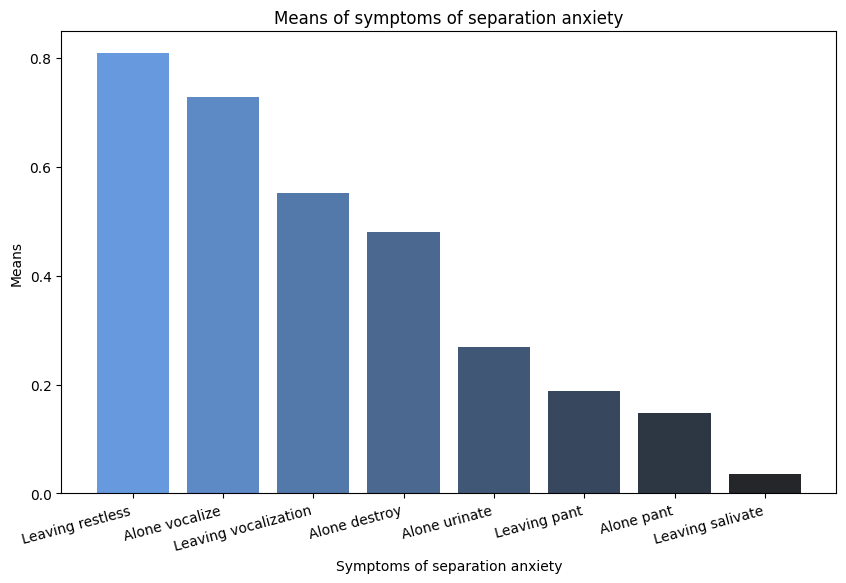

In [7]:
def graph_sep_anx5():
    mean = get_mean()
    columns = ['Leaving_pant', 'Leaving_vocalization', 'Leaving_salivate', 'Leaving_restless', 'Alone_destroy', 'Alone_urinate', 'Alone_vocalize', 'Alone_pant']
    subset = get_subset(["separation_anxiety", "separation_behavior_score"]+columns)

    mean_values, symptoms = zip(*sorted([(subset[i].mean(),i.replace("_", " ")) for i in columns], key=lambda x: x[0])[::-1])
    plt.figure(figsize=(10, 6))
    palette = sns.dark_palette("#69d", reverse=True, n_colors=len(mean_values))

    plt.bar(symptoms, mean_values, color = palette)

    plt.xticks(rotation=15, ha='right')
    plt.xlabel('Symptoms of separation anxiety')

    ticks = plt.yticks()[0]   
    plt.yticks(ticks[::2])  
    plt.ylabel('Means')

    plt.title('Means of symptoms of separation anxiety')

graph_sep_anx5()

In [8]:
#neplanujem pouzit
def graph_sep_anx10():
    mean = get_mean()
    subset = get_subset(["separation_anxiety", "separation_behavior_score", "Separation_age", "breed_group"])

    fig = px.scatter(
        subset,
        x="Separation_age",
        y="separation_behavior_score",
        color="breed_group",
        hover_data=["breed_group"],
        title="Separation Age vs Behavior Score by Breed Group"
    )

    fig.update_layout(
        xaxis_title="Separation Age",
        yaxis_title="Separation Behavior Score",
        legend_title="Breed Group"
    )
    fig.show()
    
graph_sep_anx10()


Zistujeme najuskostlivejsie plemeno psa


breed_group
Miniature_Pinscher                     0.174432
Pointers                               0.146835
Livestock_guardian_dogs                0.123943
Middle_European_utility_dogs           0.096778
Mastiff_type_dogs                      0.078604
Japanese_Asian_primitive               0.078573
Other_companion_dogs                   0.073958
Yard_terriers                          0.068783
German_Shepherd_Dog                    0.064028
Middle_European_herders                0.053128
Other_breed                            0.047092
Bichon_type_dogs                       0.021099
Northern_hunting_spitz                 0.016614
Chinese_Crested_Dog                    0.013121
Retrievers_flushing_dogs               0.005559
Jack_Russell_Terrier                   0.001405
Dachshunds                            -0.009008
Nova_Scotia_Duck_Tolling_Retriever    -0.009208
Australian_Shepherd                   -0.014521
Hunting_terriers                      -0.015044
Fighting_dogs               

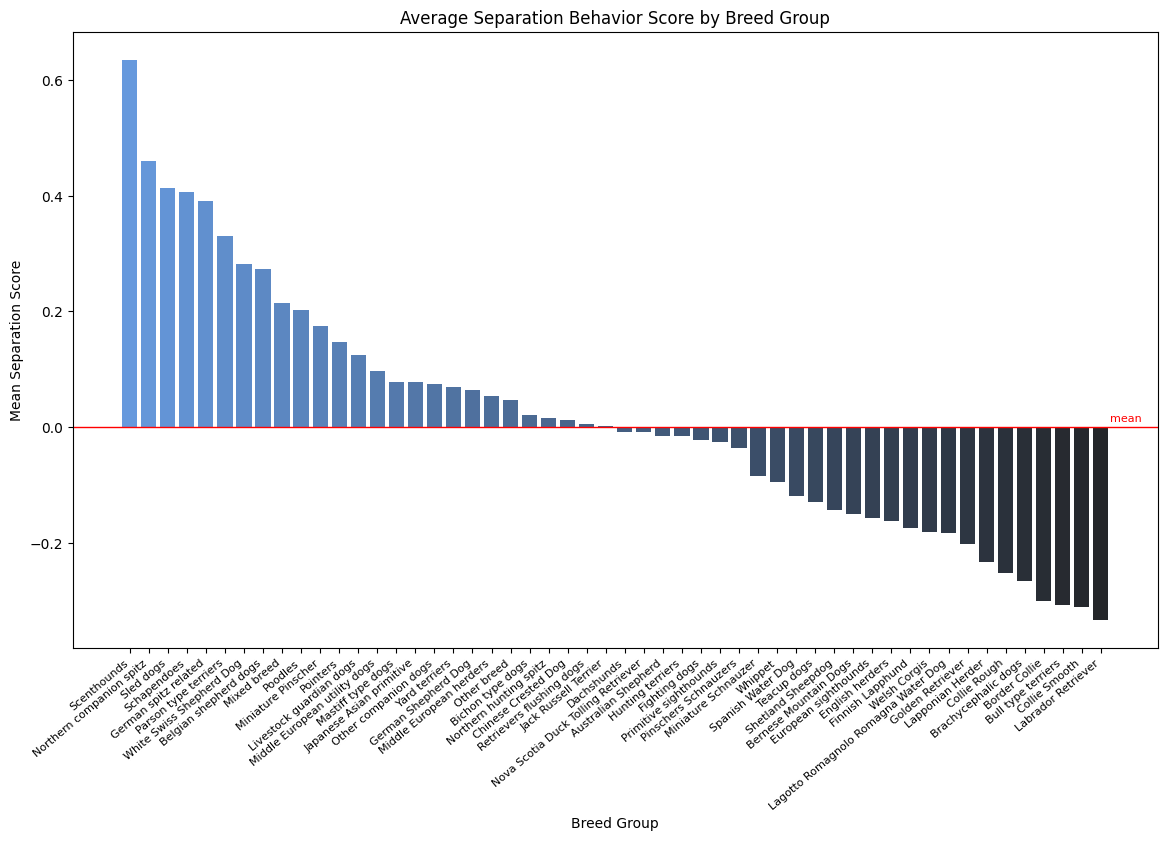

In [9]:
def graph_sep_anx6():
    mean = get_mean()
    subset = get_subset(["separation_behavior_score",  "breed_group"])

    a = subset.groupby("breed_group")["separation_behavior_score"].mean().sort_values(ascending=False)
    print(a[10:])
    plt.figure(figsize=(14, 8))

    palette = sns.dark_palette("#69d", n_colors=len(a))[::-1]
    bars = plt.bar(a.index, a.values, color = palette)

    plt.axhline(y=mean, color='red', linestyle='-', linewidth=1)
    plt.text(len(a) - 0.5, mean + 0.01, 'mean', color='red', fontsize=8)
    plt.xticks([i for i in a.index], [i.replace("_", " ") for i in a.index],rotation=40, ha='right',fontsize = 8)
    plt.title('Average Separation Behavior Score by Breed Group')
    plt.ylabel('Mean Separation Score')
    plt.xlabel('Breed Group')

    plt.show()

graph_sep_anx6()

background informations

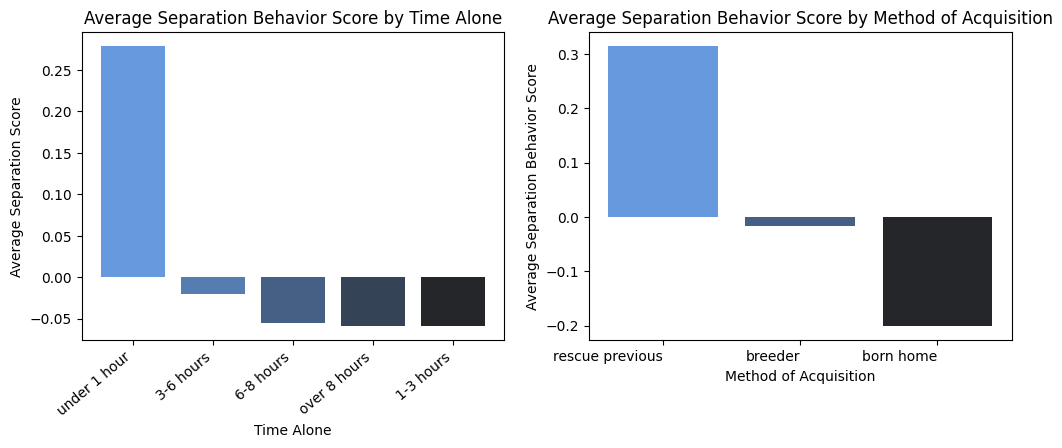

In [10]:

def graph_sep_anx7():
    mean = get_mean()
    subset = get_subset(["separation_behavior_score","obtained_from","alone_time"])

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    #alone time
    alone = subset.groupby("alone_time")["separation_behavior_score"].mean().sort_values(ascending=False)
    palette = sns.dark_palette("#69d", n_colors=len(alone))[::-1]

    axes[0].bar(alone.index, alone.values, color = palette )

    axes[0].set_title('Average Separation Behavior Score by Time Alone')
    axes[0].set_ylabel('Average Separation Score')
    axes[0].set_xlabel('Time Alone')
    axes[0].set_xticks(range(len(alone)))
    axes[0].set_xticklabels([i.replace("_", " ") for i in alone.index], rotation=40, ha='right')

    #obtained_from

    obtained = subset.groupby("obtained_from")["separation_behavior_score"].mean().sort_values(ascending=False)
    palette = sns.dark_palette("#69d", n_colors=len(obtained))[::-1]

    axes[1].bar(obtained.index, obtained.values, color = palette, )
    axes[1].set_title('Average Separation Behavior Score by Method of Acquisition')
    axes[1].set_ylabel('Average Separation Behavior Score')
    axes[1].set_xlabel('Method of Acquisition')
    axes[1].set_xticks(range(len(obtained)))
    axes[1].set_xticklabels([i.replace("_", " ") for i in obtained.index], ha='right')


graph_sep_anx7()

